In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import FastICA
from pandas import DataFrame, Series
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
np.set_printoptions(precision=3 , suppress= True)

In [2]:
#importing the file and defining the columns I am going to work with:
filePath = './rovr.txt'
columnsName = ['YYMMMDD', '__east(m)', '_north(m)', '____up(m)', 'sig_e(m)', 'sig_n(m)', 'sig_u(m)']
site = pd.read_csv(filePath, usecols = columnsName, delimiter = '\s+')
site

,YYMMMDD,__east(m),_north(m),____up(m),sig_e(m),sig_n(m),sig_u(m)
0,08JUN19,-0.298069,0.621008,0.065644,0.000759,0.000941,0.003012
1,08JUN20,-0.296662,0.621513,0.064644,0.000760,0.000950,0.003028
2,08OCT09,-0.294944,0.624786,0.059454,0.000755,0.000931,0.002986
3,08OCT10,-0.295009,0.626138,0.060235,0.000756,0.000940,0.003031
4,08OCT11,-0.293284,0.624527,0.060894,0.000748,0.000935,0.002969
...,...,...,...,...,...,...,...
4953,24JAN02,0.021468,0.879262,0.068496,0.000704,0.000884,0.002825
4954,24JAN03,0.023850,0.879770,0.067226,0.000704,0.000891,0.002866
4955,24JAN04,0.022527,0.880270,0.073395,0.000701,0.000885,0.002836
4956,24JAN05,0.018986,0.883751,0.071513,0.000729,0.000932,0.002958


In [3]:
#changing the dtype of 'YYMMMDD':
site['YYMMMDD'] = pd.to_datetime(site['YYMMMDD'], format='%y%b%d')
site['YYMMMDD']

0      2008-06-19
1      2008-06-20
2      2008-10-09
3      2008-10-10
4      2008-10-11
          ...    
4953   2024-01-02
4954   2024-01-03
4955   2024-01-04
4956   2024-01-05
4957   2024-01-06
Name: YYMMMDD, Length: 4958, dtype: datetime64[ns]

In [4]:
#seting 'YYMMMDD' as index:
site.set_index('YYMMMDD', inplace = True)
site

,__east(m),_north(m),____up(m),sig_e(m),sig_n(m),sig_u(m)
YYMMMDD,,,,,,
2008-06-19,-0.298069,0.621008,0.065644,0.000759,0.000941,0.003012
2008-06-20,-0.296662,0.621513,0.064644,0.000760,0.000950,0.003028
2008-10-09,-0.294944,0.624786,0.059454,0.000755,0.000931,0.002986
2008-10-10,-0.295009,0.626138,0.060235,0.000756,0.000940,0.003031
2008-10-11,-0.293284,0.624527,0.060894,0.000748,0.000935,0.002969
...,...,...,...,...,...,...
2024-01-02,0.021468,0.879262,0.068496,0.000704,0.000884,0.002825
2024-01-03,0.023850,0.879770,0.067226,0.000704,0.000891,0.002866
2024-01-04,0.022527,0.880270,0.073395,0.000701,0.000885,0.002836


In [135]:
#creating a new instance with a new period for the time series:
sitePeriodTime = site.loc['2009-04-01':'2011-04-01']
sitePeriodTime

,__east(m),_north(m),____up(m),sig_e(m),sig_n(m),sig_u(m)
YYMMMDD,,,,,,
2009-04-01,-0.280010,0.637079,0.056820,0.000904,0.001152,0.003657
2009-04-02,-0.278817,0.637240,0.052465,0.000777,0.000975,0.003129
2009-04-03,-0.280810,0.636191,0.067228,0.000776,0.000966,0.003089
2009-04-04,-0.280819,0.634999,0.063011,0.000754,0.000951,0.003021
2009-04-05,-0.281176,0.635699,0.065351,0.000762,0.000954,0.003062
...,...,...,...,...,...,...
2011-03-28,-0.240119,0.667837,0.070656,0.000759,0.000933,0.003044
2011-03-29,-0.238977,0.668282,0.068237,0.000751,0.000929,0.002995
2011-03-30,-0.238943,0.669506,0.069162,0.000757,0.000935,0.003029


In [136]:
siteDetrended = sitePeriodTime.sub(sitePeriodTime.mean())
siteDetrended

,__east(m),_north(m),____up(m),sig_e(m),sig_n(m),sig_u(m)
YYMMMDD,,,,,,
2009-04-01,-0.018561,-0.013933,-0.010593,0.000135,0.000182,0.000546
2009-04-02,-0.017368,-0.013772,-0.014948,0.000008,0.000005,0.000018
2009-04-03,-0.019361,-0.014821,-0.000185,0.000007,-0.000004,-0.000022
2009-04-04,-0.019370,-0.016013,-0.004402,-0.000015,-0.000019,-0.000090
2009-04-05,-0.019727,-0.015313,-0.002062,-0.000007,-0.000016,-0.000049
...,...,...,...,...,...,...
2011-03-28,0.021330,0.016825,0.003243,-0.000010,-0.000037,-0.000067
2011-03-29,0.022472,0.017270,0.000824,-0.000018,-0.000041,-0.000116
2011-03-30,0.022506,0.018494,0.001749,-0.000012,-0.000035,-0.000082


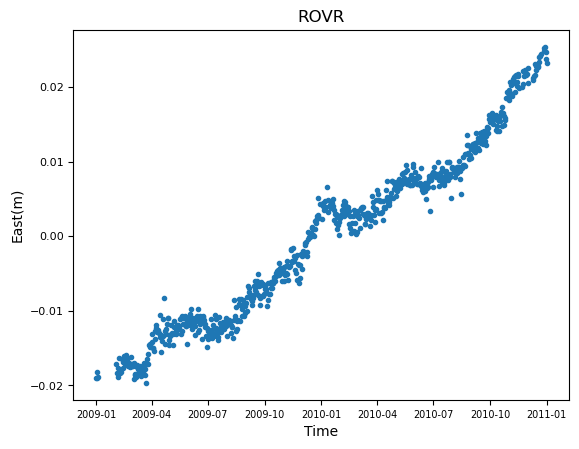

In [132]:
#checking the if the ts is stationarity for east:
plt.plot(siteDetrended.index, siteDetrended['__east(m)'], '.')
plt.title('ROVR')
plt.xlabel('Time')
plt.xticks(fontsize=7)
plt.ylabel('East(m)')
plt.yticks(fontsize=8)
plt.show()

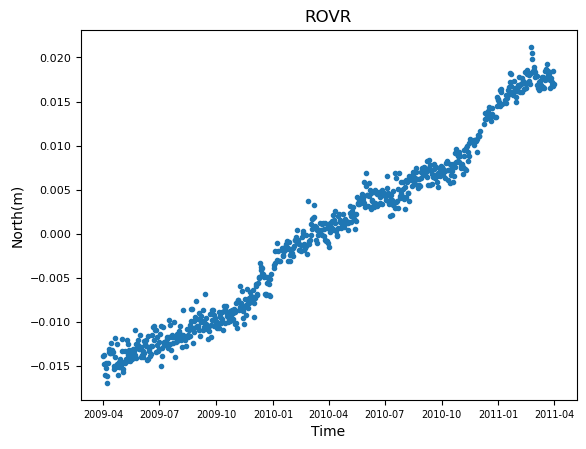

In [139]:
#checking the if the ts is stationarity for north:
plt.plot(siteDetrended.index, siteDetrended['_north(m)'], '.')
plt.title('ROVR')
plt.xlabel('Time')
plt.xticks(fontsize=7)
plt.ylabel('North(m)')
plt.yticks(fontsize=8)
plt.show()

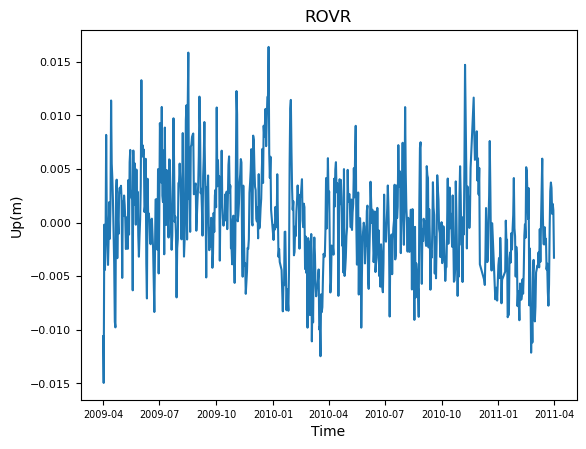

In [141]:
#checking the if the ts is stationarity for up:
plt.plot(siteDetrended.index, siteDetrended['____up(m)'])
plt.title('ROVR')
plt.xlabel('Time')
plt.xticks(fontsize=7)
plt.ylabel('Up(m)')
plt.yticks(fontsize=8)
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

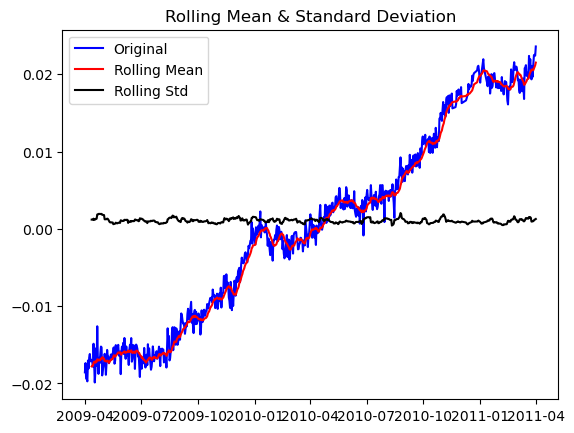

Results of Dickey-Fuller Test:
Test Statistic                   0.234109
p-value                          0.974111
#Lags Used                       6.000000
Number of Observations Used    699.000000
Critical Value (1%)             -3.439740
Critical Value (5%)             -2.865684
Critical Value (10%)            -2.568977
dtype: float64


In [142]:
test_stationarity(siteDetrended['__east(m)'])

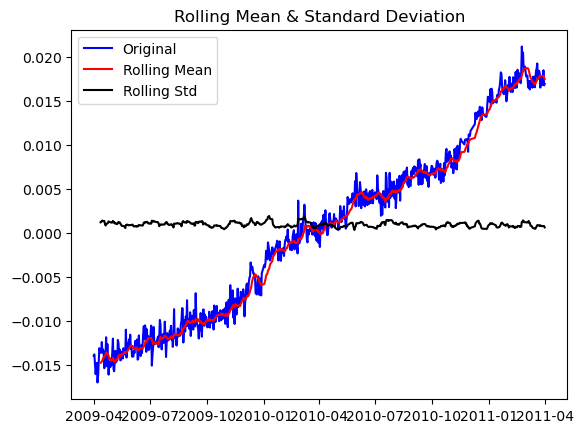

Results of Dickey-Fuller Test:
Test Statistic                   0.360425
p-value                          0.979953
#Lags Used                      12.000000
Number of Observations Used    693.000000
Critical Value (1%)             -3.439821
Critical Value (5%)             -2.865720
Critical Value (10%)            -2.568996
dtype: float64


In [143]:
test_stationarity(siteDetrended['_north(m)'])

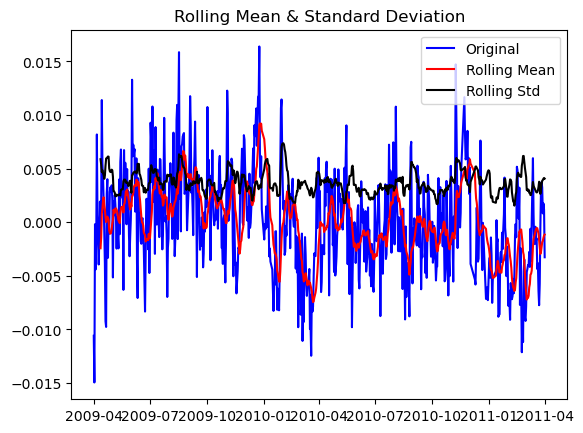

Results of Dickey-Fuller Test:
Test Statistic                -6.681576e+00
p-value                        4.328838e-09
#Lags Used                     5.000000e+00
Number of Observations Used    7.000000e+02
Critical Value (1%)           -3.439726e+00
Critical Value (5%)           -2.865678e+00
Critical Value (10%)          -2.568973e+00
dtype: float64


In [144]:
test_stationarity(siteDetrended['____up(m)'])

In [145]:
tsLogE = np.log1p(siteDetrended['__east(m)'])
tsLogE

YYMMMDD
2009-04-01   -0.018736
2009-04-02   -0.017521
2009-04-03   -0.019551
2009-04-04   -0.019560
2009-04-05   -0.019925
                ...   
2011-03-28    0.021105
2011-03-29    0.022223
2011-03-30    0.022256
2011-03-31    0.022150
2011-04-01    0.023314
Name: __east(m), Length: 706, dtype: float64

In [146]:
tsLogN = np.log1p(siteDetrended['_north(m)'])
tsLogN

YYMMMDD
2009-04-01   -0.014031
2009-04-02   -0.013868
2009-04-03   -0.014932
2009-04-04   -0.016143
2009-04-05   -0.015432
                ...   
2011-03-28    0.016685
2011-03-29    0.017123
2011-03-30    0.018325
2011-03-31    0.016647
2011-04-01    0.016820
Name: _north(m), Length: 706, dtype: float64

In [147]:
tsLogU = np.log1p(siteDetrended['____up(m)'])
tsLogU

YYMMMDD
2009-04-01   -0.010649
2009-04-02   -0.015060
2009-04-03   -0.000185
2009-04-04   -0.004411
2009-04-05   -0.002064
                ...   
2011-03-28    0.003238
2011-03-29    0.000824
2011-03-30    0.001748
2011-03-31    0.001155
2011-04-01   -0.003273
Name: ____up(m), Length: 706, dtype: float64

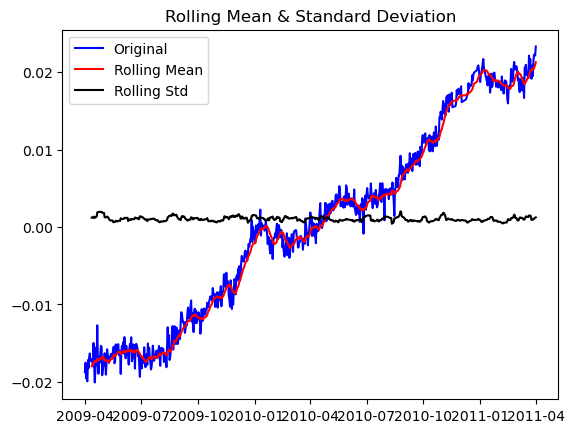

Results of Dickey-Fuller Test:
Test Statistic                   0.191069
p-value                          0.971756
#Lags Used                       6.000000
Number of Observations Used    699.000000
Critical Value (1%)             -3.439740
Critical Value (5%)             -2.865684
Critical Value (10%)            -2.568977
dtype: float64


In [148]:
test_stationarity(tsLogE)

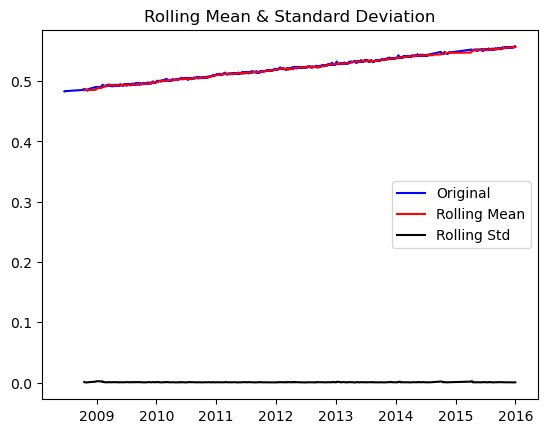

Results of Dickey-Fuller Test:
Test Statistic                   -0.442904
p-value                           0.902685
#Lags Used                       10.000000
Number of Observations Used    2332.000000
Critical Value (1%)              -3.433157
Critical Value (5%)              -2.862780
Critical Value (10%)             -2.567430
dtype: float64


In [81]:
test_stationarity(tsLogN)

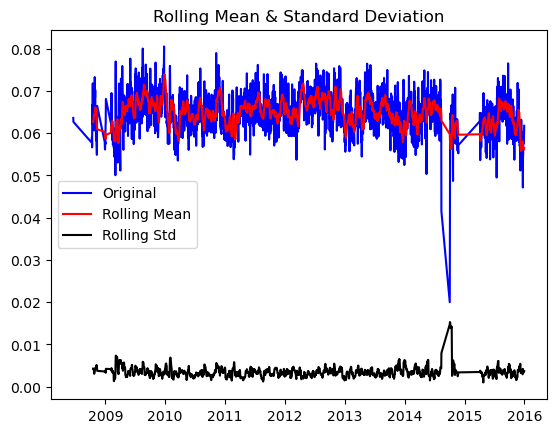

Results of Dickey-Fuller Test:
Test Statistic                -6.142944e+00
p-value                        7.890738e-08
#Lags Used                     1.800000e+01
Number of Observations Used    2.324000e+03
Critical Value (1%)           -3.433167e+00
Critical Value (5%)           -2.862784e+00
Critical Value (10%)          -2.567432e+00
dtype: float64


In [82]:
test_stationarity(tsLogU)

In [84]:
siteLogDiffE = tsLogE - tsLogE.shift()
siteLogDiffE

YYMMMDD
2008-06-19         NaN
2008-06-20    0.002002
2008-10-09    0.002440
2008-10-10   -0.000092
2008-10-11    0.002444
                ...   
2015-12-27   -0.000091
2015-12-28   -0.000121
2015-12-29    0.000281
2015-12-30    0.000117
2015-12-31    0.000051
Name: __east(m), Length: 2343, dtype: float64

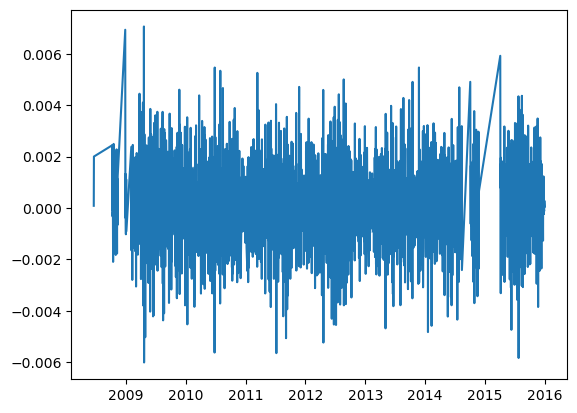

In [117]:
plt.plot(siteLogDiffE)
plt.show()

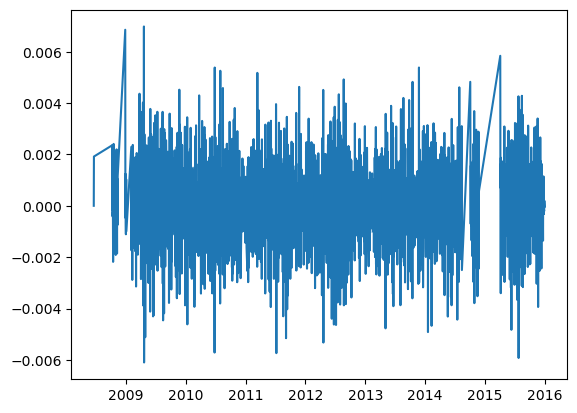

In [118]:
plt.plot(tsLogDiffE_detrended)
plt.show()

In [85]:
siteLogDiffN = tsLogN - tsLogN.shift()
siteLogDiffN

YYMMMDD
2008-06-19         NaN
2008-06-20    0.000311
2008-10-09    0.002016
2008-10-10    0.000832
2008-10-11   -0.000991
                ...   
2015-12-27    0.000445
2015-12-28    0.000305
2015-12-29   -0.000832
2015-12-30    0.000409
2015-12-31    0.000281
Name: _north(m), Length: 2343, dtype: float64

In [86]:
siteLogDiffE.fillna(siteLogDiffE.mean(), inplace = True)
siteLogDiffN.fillna(siteLogDiffN.mean(), inplace = True)

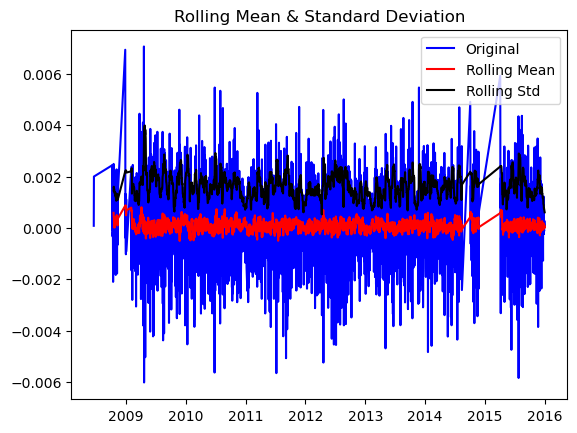

Results of Dickey-Fuller Test:
Test Statistic                  -28.274124
p-value                           0.000000
#Lags Used                        5.000000
Number of Observations Used    2337.000000
Critical Value (1%)              -3.433151
Critical Value (5%)              -2.862778
Critical Value (10%)             -2.567429
dtype: float64


In [87]:
test_stationarity(siteLogDiffE)

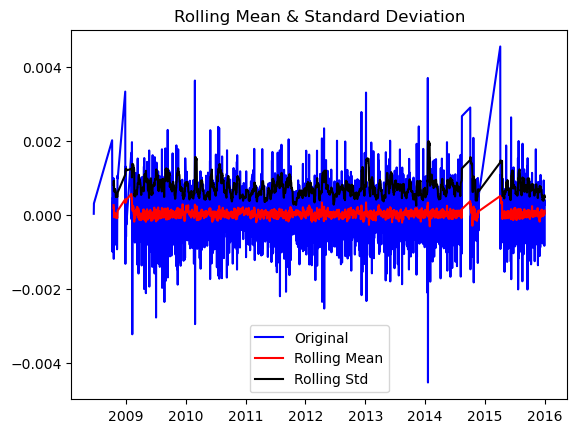

Results of Dickey-Fuller Test:
Test Statistic                  -21.252593
p-value                           0.000000
#Lags Used                        9.000000
Number of Observations Used    2333.000000
Critical Value (1%)              -3.433156
Critical Value (5%)              -2.862780
Critical Value (10%)             -2.567430
dtype: float64


In [88]:
test_stationarity(siteLogDiffN)

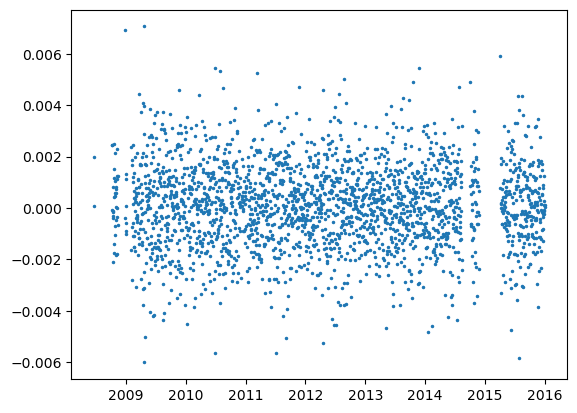

In [89]:
plt.plot(siteLogDiffE, '.', markersize=3)

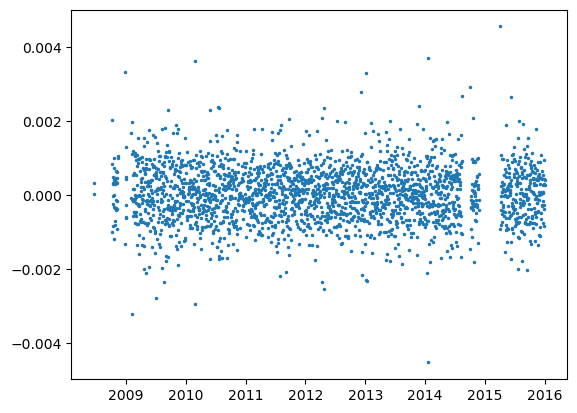

In [90]:
plt.plot(siteLogDiffN, '.', markersize=3)

In [91]:
x = np.arange(len(siteLogDiffE)).reshape(-1,1)

#linear trend - east
yE = siteLogDiffE.values.reshape(-1,1)
linearModelE = LinearRegression().fit(x,yE)
regressionLineE = linearModelE.predict(x)

#linear trend - north
yN = siteLogDiffN.values.reshape(-1,1)
linearModelE = LinearRegression().fit(x,yE)
regressionLineE = linearModelE.predict(x)

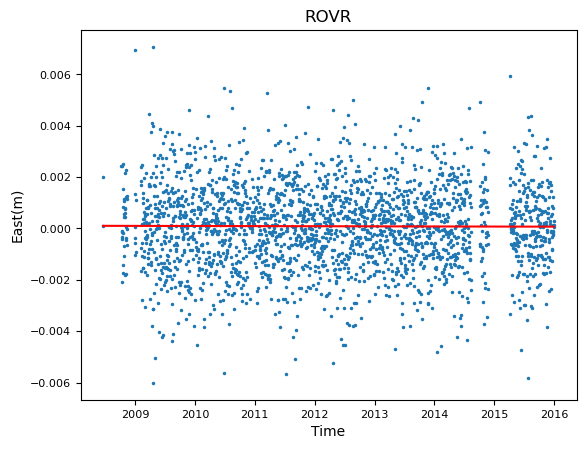

In [93]:
#EAST
plt.plot(siteLogDiffE, '.', markersize=3)
plt.plot(siteLogDiffE.index, regressionLineE, color = 'red', label = 'Linear Trend')
plt.title('ROVR')
plt.xlabel('Time')
plt.xticks(fontsize=8)
plt.ylabel('East(m)')
plt.yticks(fontsize=8)
plt.show()

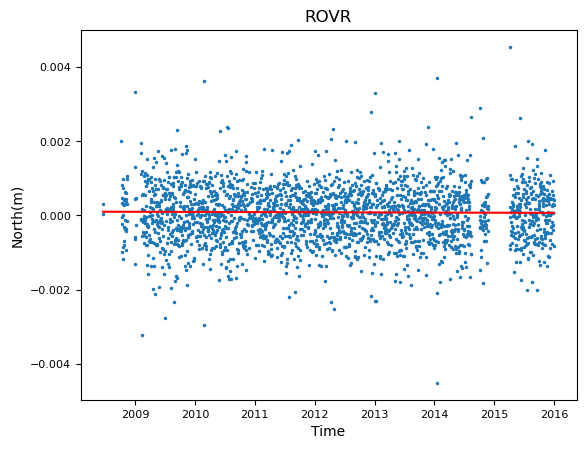

In [94]:
#NORTH
plt.plot(siteLogDiffN, '.', markersize=3)
plt.plot(siteLogDiffN.index, regressionLineE, color = 'red', label = 'Linear Trend')
plt.title('ROVR')
plt.xlabel('Time')
plt.xticks(fontsize=8)
plt.ylabel('North(m)')
plt.yticks(fontsize=8)
plt.show()

In [99]:
siteLogDiffE

YYMMMDD
2008-06-19    0.000085
2008-06-20    0.002002
2008-10-09    0.002440
2008-10-10   -0.000092
2008-10-11    0.002444
                ...   
2015-12-27   -0.000091
2015-12-28   -0.000121
2015-12-29    0.000281
2015-12-30    0.000117
2015-12-31    0.000051
Name: __east(m), Length: 2343, dtype: float64

In [106]:
#removing outliers from the time series east(m) and north(m):
limiarZ = 1.0
siteLogDiffE_out = siteLogDiffE[(np.abs(siteLogDiffE-siteLogDiffE.mean()) 
                                              < limiarZ*siteLogDiffE.std())]
siteLogDiffE_out

YYMMMDD
2008-06-19    0.000085
2008-10-10   -0.000092
2008-10-12   -0.000330
2008-10-13   -0.000134
2008-10-14   -0.000396
                ...   
2015-12-27   -0.000091
2015-12-28   -0.000121
2015-12-29    0.000281
2015-12-30    0.000117
2015-12-31    0.000051
Name: __east(m), Length: 1653, dtype: float64

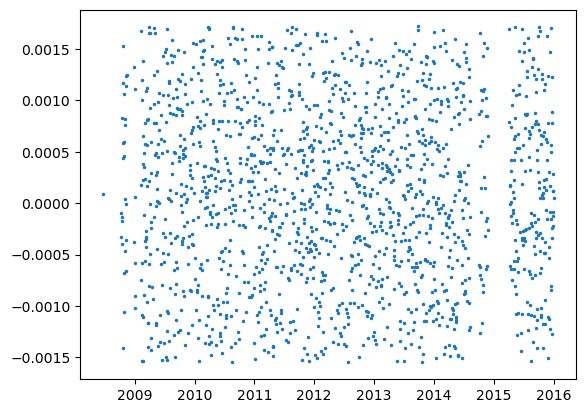

In [108]:
plt.plot(siteLogDiffE_out, '.', markersize=3)
#

In [112]:
siteLogDiffN.to_excel('./rovr_siteLogDiffN.xlsx', index=True)